### Sensor Constants

In [1]:
sensor_name = 'co_all_sensors'
sensor_co_name = 'alpha_co_conc'
sensor_no2_name = 'alpha_no2_conc'
sensor_o3_1_name = 'alpha_o3_1_conc'
sensor_o3_2_name = 'alpha_o3_2_conc'
sensor_so2_1_name = 'alpha_so2_1_conc'
sensor_so2_2_name = 'alpha_so2_2_conc'
sensor_pm_10_name = 'alpha_pm_10_conc'

## Upload Data from File

### CO Sensor

In [2]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_co_name + '_and_temp_valid_1HR.csv'
df_co = pd.read_csv(directory_path + file_name)
df_co.head()

,DateTime,measuring,Hour,temperature,measuring no Temp,Count,Tag
0,2022-11-27 17:30:00,0.095855,17,29.78500,0.166201,3,VALID
1,2022-11-27 18:30:00,0.091372,18,30.13125,0.159629,4,VALID
2,2022-11-27 19:30:00,0.088210,19,30.09375,0.156693,4,VALID
3,2022-11-27 20:30:00,0.087858,20,30.03750,0.156680,4,VALID
4,2022-11-27 21:30:00,0.090610,21,29.96875,0.159847,4,VALID


### Create Sensor Dataframe as Pandas Series

In [3]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df_co.drop(df_co.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df_co['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_co_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_co_dataframe.index = sensor_co_dataframe['DateTime']
sensor_co_dataframe = sensor_co_dataframe.drop(columns=['DateTime', 'Hour', 'Count', 'Tag'])
sensor_co_dataframe = sensor_co_dataframe.rename(columns={'measuring': 'measuring CO', 'measuring no Temp': 'measuring no Temp CO', 'temperature': 'temperature CO'})
sensor_co_dataframe

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/554760737.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df_co['DateTime'], infer_datetime_format=True))


,measuring CO,temperature CO,measuring no Temp CO
DateTime,,,
2022-11-27 17:30:00,0.095855,29.78500,0.166201
2022-11-27 18:30:00,0.091372,30.13125,0.159629
2022-11-27 19:30:00,0.088210,30.09375,0.156693
2022-11-27 20:30:00,0.087858,30.03750,0.156680
2022-11-27 21:30:00,0.090610,29.96875,0.159847
...,...,...,...
2023-02-04 03:30:00,0.030431,27.14750,0.116688
2023-02-04 04:30:00,0.028936,27.26000,0.114515
2023-02-04 05:30:00,0.033254,27.31750,0.118485


### NO2 Sensor

In [4]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_no2_name + '_and_temp_valid_1HR.csv'
df_no2 = pd.read_csv(directory_path + file_name)
df_no2.head()

,DateTime,measuring,Hour,temperature,Count,Tag
0,2022-11-27 17:30:00,182.373362,17,29.78500,3,VALID
1,2022-11-27 18:30:00,188.127215,18,30.13125,4,VALID
2,2022-11-27 19:30:00,175.393318,19,30.09375,4,VALID
3,2022-11-27 20:30:00,185.269497,20,30.03750,4,VALID
4,2022-11-27 21:30:00,179.436459,21,29.96875,4,VALID


### Create Sensor Dataframe as Pandas Series

In [5]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df_no2.drop(df_no2.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df_no2['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_no2_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_no2_dataframe.index = sensor_no2_dataframe['DateTime']
sensor_no2_dataframe = sensor_no2_dataframe.drop(columns=['DateTime', 'Hour', 'Count', 'Tag'])
sensor_no2_dataframe = sensor_no2_dataframe.rename(columns={'measuring': 'measuring NO2', 'measuring no Temp': 'measuring no Temp NO2', 'temperature': 'temperature NO2'})
sensor_no2_dataframe

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/4266076299.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df_no2['DateTime'], infer_datetime_format=True))


,measuring NO2,temperature NO2
DateTime,,
2022-11-27 17:30:00,182.373362,29.785000
2022-11-27 18:30:00,188.127215,30.131250
2022-11-27 19:30:00,175.393318,30.093750
2022-11-27 20:30:00,185.269497,30.037500
2022-11-27 21:30:00,179.436459,29.968750
...,...,...
2022-12-23 16:30:00,34.320839,31.335000
2022-12-23 18:30:00,51.619244,29.111667
2022-12-23 19:30:00,153.853416,26.977500


### O3

#### Sensor 1

In [6]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_o3_1_name + '_and_temp_valid_1HR.csv'
df_o3_1 = pd.read_csv(directory_path + file_name)
df_o3_1.head()

,DateTime,measuring 1,temperature,Hour,measuring 1 no Temp,Count 1,Tag
0,2022-12-14 14:30:00,42.267696,31.52000,14,55.212642,3,VALID
1,2022-12-14 15:30:00,50.822340,30.56750,15,68.061880,4,VALID
2,2022-12-14 16:30:00,67.516902,28.82875,16,92.596049,4,VALID
3,2022-12-14 17:30:00,68.069052,27.91125,17,97.284986,4,VALID
4,2022-12-14 18:30:00,84.294900,27.16250,18,116.886768,4,VALID


### Create Sensor Dataframe as Pandas Series

In [7]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df_o3_1.drop(df_o3_1.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df_o3_1['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_o3_1_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_o3_1_dataframe.index = sensor_o3_1_dataframe['DateTime']
sensor_o3_1_dataframe = sensor_o3_1_dataframe.drop(columns=['DateTime', 'Hour', 'Count 1', 'Tag'])
sensor_o3_1_dataframe = sensor_o3_1_dataframe.rename(columns={'measuring 1': 'measuring O3 1', 'measuring 1 no Temp': 'measuring no Temp O3 1', 
                                                            'temperature': 'temperature O3 1'})
sensor_o3_1_dataframe

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/4189083599.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df_o3_1['DateTime'], infer_datetime_format=True))


,measuring O3 1,temperature O3 1,measuring no Temp O3 1
DateTime,,,
2022-12-14 14:30:00,42.267696,31.52000,55.212642
2022-12-14 15:30:00,50.822340,30.56750,68.061880
2022-12-14 16:30:00,67.516902,28.82875,92.596049
2022-12-14 17:30:00,68.069052,27.91125,97.284986
2022-12-14 18:30:00,84.294900,27.16250,116.886768
...,...,...,...
2023-04-19 16:30:00,50.962218,28.84750,75.956825
2023-04-19 17:30:00,56.130342,27.83625,85.684433
2023-04-19 18:30:00,40.233330,25.86125,78.692223


### Sensor 2

In [8]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_o3_2_name + '_and_temp_valid_1HR.csv'
df_o3_2 = pd.read_csv(directory_path + file_name)
df_o3_2.head()

,DateTime,measuring 2,temperature,Hour,measuring 2 no Temp,Count 2,Tag
0,2022-12-01 20:30:00,52.019892,29.29875,20,11.663582,4,VALID
1,2022-12-01 21:30:00,51.941364,29.25375,21,11.695902,4,VALID
2,2022-12-01 22:30:00,51.916824,29.23250,22,11.723707,4,VALID
3,2022-12-01 23:30:00,51.907008,29.23250,23,11.713891,4,VALID
4,2022-12-02 00:30:00,51.943818,29.26375,0,11.673723,4,VALID


### Create Sensor Dataframe as Pandas Series

In [9]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df_o3_2.drop(df_o3_2.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df_o3_2['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_o3_2_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_o3_2_dataframe.index = sensor_o3_2_dataframe['DateTime']
sensor_o3_2_dataframe = sensor_o3_2_dataframe.drop(columns=['DateTime', 'Hour', 'Count 2', 'Tag'])
sensor_o3_2_dataframe = sensor_o3_2_dataframe.rename(columns={'measuring 2': 'measuring O3 2', 'measuring 2 no Temp': 'measuring no Temp O3 2', 
                                                            'temperature': 'temperature O3 2'})
sensor_o3_2_dataframe

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/2290086274.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df_o3_2['DateTime'], infer_datetime_format=True))


,measuring O3 2,temperature O3 2,measuring no Temp O3 2
DateTime,,,
2022-12-01 20:30:00,52.019892,29.29875,11.663582
2022-12-01 21:30:00,51.941364,29.25375,11.695902
2022-12-01 22:30:00,51.916824,29.23250,11.723707
2022-12-01 23:30:00,51.907008,29.23250,11.713891
2022-12-02 00:30:00,51.943818,29.26375,11.673723
...,...,...,...
2023-04-21 17:30:00,50.964672,30.53625,7.560047
2023-04-21 18:30:00,42.360948,27.13750,7.328414
2023-04-21 19:30:00,39.303264,25.32750,8.729276


### SO2

#### Sensor 1

In [10]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_so2_1_name + '_and_temp_valid_1HR.csv'
df_so2_1 = pd.read_csv(directory_path + file_name)
df_so2_1.head()

,DateTime,measuring 1,temperature,Hour,measuring 1 no Temp,Count 1,Tag
0,2022-12-07 19:30:00,2334.044792,27.39125,19,2603.851233,4,VALID
1,2022-12-08 13:30:00,408.498126,34.00500,13,1809.151682,4,VALID
2,2022-12-10 08:30:00,1925.520463,32.23500,8,3023.531889,4,VALID
3,2022-12-13 20:30:00,3721.797934,24.45875,20,3490.193048,4,VALID
4,2022-12-13 21:30:00,4488.438582,23.87375,21,4156.807906,4,VALID


### Create Sensor Dataframe as Pandas Series

In [11]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df_so2_1.drop(df_so2_1.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df_so2_1['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_so2_1_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_so2_1_dataframe.index = sensor_so2_1_dataframe['DateTime']
sensor_so2_1_dataframe = sensor_so2_1_dataframe.drop(columns=['DateTime', 'Hour', 'Count 1', 'Tag'])
sensor_so2_1_dataframe = sensor_so2_1_dataframe.rename(columns={'measuring 1': 'measuring SO2 1', 'measuring 1 no Temp': 'measuring no Temp SO2 1', 
                                                            'temperature': 'temperature SO2 1'})
sensor_so2_1_dataframe

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/3688823847.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df_so2_1['DateTime'], infer_datetime_format=True))


,measuring SO2 1,temperature SO2 1,measuring no Temp SO2 1
DateTime,,,
2022-12-07 19:30:00,2334.044792,27.39125,2603.851233
2022-12-08 13:30:00,408.498126,34.00500,1809.151682
2022-12-10 08:30:00,1925.520463,32.23500,3023.531889
2022-12-13 20:30:00,3721.797934,24.45875,3490.193048
2022-12-13 21:30:00,4488.438582,23.87375,4156.807906
...,...,...,...
2023-04-16 01:30:00,3447.282268,26.69000,3597.186000
2023-04-16 02:30:00,3646.048354,26.38125,3743.160697
2023-04-16 03:30:00,4043.577251,25.72250,4028.053717


### Sensor 2

In [12]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_so2_2_name + '_and_temp_valid_1HR.csv'
df_so2_2 = pd.read_csv(directory_path + file_name)
df_so2_2.head()

,DateTime,measuring 2,temperature,Hour,measuring 2 no Temp,Count 2,Tag
0,2022-12-01 21:30:00,203.905149,29.25375,21,155.913165,4,VALID
1,2022-12-01 22:30:00,205.143240,29.23250,22,156.961135,4,VALID
2,2022-12-01 23:30:00,205.382342,29.23250,23,157.200237,4,VALID
3,2022-12-02 00:30:00,205.765561,29.26375,0,157.863047,4,VALID
4,2022-12-02 01:30:00,205.179269,29.28125,1,157.433325,4,VALID


### Create Sensor Dataframe as Pandas Series

In [13]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df_so2_2.drop(df_so2_2.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df_so2_2['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_so2_2_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_so2_2_dataframe.index = sensor_so2_2_dataframe['DateTime']
sensor_so2_2_dataframe = sensor_so2_2_dataframe.drop(columns=['DateTime', 'Hour', 'Count 2', 'Tag'])
sensor_so2_2_dataframe = sensor_so2_2_dataframe.rename(columns={'measuring 2': 'measuring SO2 2', 'measuring 2 no Temp': 'measuring no Temp SO2 2', 
                                                            'temperature': 'temperature SO2 2'})
sensor_so2_2_dataframe

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/377440947.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df_so2_2['DateTime'], infer_datetime_format=True))


,measuring SO2 2,temperature SO2 2,measuring no Temp SO2 2
DateTime,,,
2022-12-01 21:30:00,203.905149,29.25375,155.913165
2022-12-01 22:30:00,205.143240,29.23250,156.961135
2022-12-01 23:30:00,205.382342,29.23250,157.200237
2022-12-02 00:30:00,205.765561,29.26375,157.863047
2022-12-02 01:30:00,205.179269,29.28125,157.433325
...,...,...,...
2023-03-31 13:30:00,85.397741,41.20625,143.870195
2023-03-31 15:30:00,99.663088,41.13750,157.993882
2023-03-31 16:30:00,109.607124,39.82500,156.195106


### PM Sensor

In [14]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_pm_10_name + '_and_temp_valid_1HR.csv'
df_pm_10 = pd.read_csv(directory_path + file_name)
df_pm_10.head()

,DateTime,measuring,Hour,temperature,measuring no Temp,Count,Tag
0,2022-11-23 13:30:00,2.588333,13,28.635000,3.275528,3,VALID
1,2022-11-23 15:30:00,1.341250,15,26.161250,2.167685,4,VALID
2,2022-11-23 16:30:00,1.335000,16,26.441250,2.145674,4,VALID
3,2022-11-23 18:30:00,2.338333,18,28.901667,3.010518,3,VALID
4,2022-11-23 20:30:00,1.025000,20,29.287500,1.675467,4,VALID


### Create Sensor Dataframe as Pandas Series

In [15]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df_pm_10.drop(df_pm_10.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df_pm_10['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_pm_10_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_pm_10_dataframe.index = sensor_pm_10_dataframe['DateTime']
sensor_pm_10_dataframe = sensor_pm_10_dataframe.drop(columns=['DateTime', 'Hour', 'Count', 'Tag'])
sensor_pm_10_dataframe = sensor_pm_10_dataframe.rename(columns={'measuring': 'measuring PM10', 'measuring no Temp': 'measuring no Temp PM10', 'temperature': 'temperature PM10'})
sensor_pm_10_dataframe

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/2521444390.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df_pm_10['DateTime'], infer_datetime_format=True))


,measuring PM10,temperature PM10,measuring no Temp PM10
DateTime,,,
2022-11-23 13:30:00,2.588333,28.635000,3.275528
2022-11-23 15:30:00,1.341250,26.161250,2.167685
2022-11-23 16:30:00,1.335000,26.441250,2.145674
2022-11-23 18:30:00,2.338333,28.901667,3.010518
2022-11-23 20:30:00,1.025000,29.287500,1.675467
...,...,...,...
2023-04-19 19:30:00,0.375000,23.648750,1.342856
2023-04-20 14:30:00,0.698750,35.017500,1.026691
2023-04-20 15:30:00,1.735000,35.582500,2.031139


## Compare with original data

In [16]:
input_data_directory = 'input/'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Monóxido de Carbono'

## Load reference and sensor data

In [17]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path)
reference_data['DateTime'] = (pd.to_datetime(reference_data['DateTime'], infer_datetime_format=True))
reference_data = reference_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]

reference_data

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23336/2986665073.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  reference_data['DateTime'] = (pd.to_datetime(reference_data['DateTime'], infer_datetime_format=True))


DateTime
2022-01-01 02:30:00    0.1467
2022-01-01 03:30:00    0.1544
2022-01-01 04:30:00    0.1167
2022-01-01 05:30:00    0.1079
2022-01-01 06:30:00    0.1154
                        ...  
2023-02-08 12:30:00    0.0990
2023-02-08 13:30:00    0.0892
2023-02-08 14:30:00    0.0893
2023-02-08 15:30:00    0.0748
2023-02-08 16:30:00       NaN
Name: Monóxido de Carbono, Length: 9687, dtype: float64

## Merge sensor and reference data

In [18]:
import numpy as np

def merge_temperatures(df):
    # df[0]: CO, df[1]: NO2, df[2]: O31
    # df[3]: O32, df[4]: SO21, df[5]: SO22
    if not np.isnan(df[0]): return df[0]
    elif not np.isnan(df[1]): return df[1]
    elif not np.isnan(df[2]): return df[2]
    elif not np.isnan(df[3]): return df[3]
    elif not np.isnan(df[4]): return df[4]
    elif not np.isnan(df[5]): return df[5]
    return df[6]

sensor_data = pd.concat([sensor_co_dataframe, sensor_no2_dataframe, 
                        sensor_o3_1_dataframe, sensor_o3_2_dataframe, 
                        sensor_so2_1_dataframe, sensor_so2_2_dataframe,
                        sensor_pm_10_dataframe], join='outer', axis=1)

sensor_data['temperature'] = (sensor_data[['temperature CO', 'temperature NO2','temperature O3 1', 
                                        'temperature O3 2','temperature SO2 1', 'temperature SO2 2', 'temperature PM10']]
                                        .apply(lambda df: merge_temperatures(df), axis=1))
sensor_data = sensor_data.drop(columns=['temperature CO', 'temperature NO2','temperature O3 1', 
                                        'temperature O3 2','temperature SO2 1', 'temperature SO2 2', 'temperature PM10'])
sensor_data

,measuring CO,measuring no Temp CO,measuring NO2,measuring O3 1,measuring no Temp O3 1,measuring O3 2,measuring no Temp O3 2,measuring SO2 1,measuring no Temp SO2 1,measuring SO2 2,measuring no Temp SO2 2,measuring PM10,measuring no Temp PM10,temperature
DateTime,,,,,,,,,,,,,,
2022-11-23 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.588333,3.275528,28.635000
2022-11-23 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.341250,2.167685,26.161250
2022-11-23 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.335000,2.145674,26.441250
2022-11-23 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.338333,3.010518,28.901667
2022-11-23 20:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.025000,1.675467,29.287500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 17:30:00,NaN,NaN,NaN,NaN,NaN,50.964672,7.560047,NaN,NaN,NaN,NaN,NaN,NaN,30.536250
2023-04-21 18:30:00,NaN,NaN,NaN,NaN,NaN,42.360948,7.328414,NaN,NaN,NaN,NaN,NaN,NaN,27.137500
2023-04-21 19:30:00,NaN,NaN,NaN,NaN,NaN,39.303264,8.729276,NaN,NaN,NaN,NaN,NaN,NaN,25.327500


In [19]:
sensor_data = pd.concat([sensor_data, reference_data], axis=1, join='inner')
sensor_data = sensor_data.rename(columns={'Monóxido de Carbono': 'reference'})
sensor_data

,measuring CO,measuring no Temp CO,measuring NO2,measuring O3 1,measuring no Temp O3 1,measuring O3 2,measuring no Temp O3 2,measuring SO2 1,measuring no Temp SO2 1,measuring SO2 2,measuring no Temp SO2 2,measuring PM10,measuring no Temp PM10,temperature,reference
DateTime,,,,,,,,,,,,,,,
2022-11-23 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.588333,3.275528,28.635000,0.0715
2022-11-23 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.341250,2.167685,26.161250,0.0399
2022-11-23 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.335000,2.145674,26.441250,0.0635
2022-11-23 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.338333,3.010518,28.901667,0.1368
2022-11-23 20:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.025000,1.675467,29.287500,0.1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 12:30:00,NaN,NaN,NaN,NaN,NaN,80.255616,15.235664,NaN,NaN,105.037977,147.029487,1.288333,1.365750,39.311250,0.0990
2023-02-08 13:30:00,NaN,NaN,NaN,NaN,NaN,81.669120,15.374417,NaN,NaN,101.837936,148.459469,1.476250,1.533380,39.828750,0.0892
2023-02-08 14:30:00,NaN,NaN,NaN,NaN,NaN,80.498562,13.951373,NaN,NaN,106.043517,153.582107,1.775000,1.826360,39.931250,0.0893


## Calibrate data

### Prepare training and test sets

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

reference_median = sensor_data['reference'].median()
temperature_mean = sensor_data['temperature'].mean()
sensor_co_median = sensor_data['measuring CO'].median()
trend_co_median = sensor_data['measuring no Temp CO'].median()
sensor_no2_median = sensor_data['measuring NO2'].median()
sensor_o3_1_median = sensor_data['measuring O3 1'].median()
trend_o3_1_median = sensor_data['measuring no Temp O3 1'].median()
sensor_o3_2_median = sensor_data['measuring O3 2'].median()
trend_o3_2_median  = sensor_data['measuring no Temp O3 2'].median()
sensor_so2_1_median = sensor_data['measuring SO2 1'].median()
trend_so2_1_median = sensor_data['measuring no Temp SO2 1'].median()
sensor_so2_2_median = sensor_data['measuring SO2 2'].median()
trend_so2_2_median = sensor_data['measuring no Temp SO2 2'].median()
sensor_pm_10_median = sensor_data['measuring PM10'].median()

variables_names = ['measuring CO', 'measuring NO2', 'measuring O3 1', 
                   'measuring O3 2', 'measuring PM10', 'temperature']

y = sensor_data['reference'].fillna(value=reference_median)
X = (sensor_data[variables_names].fillna(value={
                        variables_names[0]: sensor_co_median,
                        variables_names[1]: sensor_no2_median,
                        variables_names[2]: sensor_o3_1_median, 
                        variables_names[3]: sensor_o3_2_median, 
                        variables_names[4]: sensor_pm_10_median,
                        variables_names[5]: temperature_mean}).values.reshape(-1,6))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Grid search with different models and variables combinations

In [21]:
from itertools import combinations

def check_if_list_contains(list1, list2):
    return [element for element in list1 if element in list2]

indexes = []
reference_indexes = [0]
num_variables = len(variables_names)
for num_combinations in list(range(num_variables)):
    contains_reference = False
    index_list = [list(index_tuple) for index_tuple in list(combinations(list(range(num_variables)), r=num_combinations+1))]
    for sublist in index_list:
        contains_reference = check_if_list_contains(sublist, reference_indexes)
        if contains_reference: 
            indexes.append(sublist)
            contains_reference = False

feature_subsets = { }
for index_list in indexes:
    key = ""
    trends_subset = ""
    for index in index_list:
        key = key + variables_names[index] + ","
    feature_subsets[key] = index_list
feature_subsets

{'measuring CO,': [0],
 'measuring CO,measuring NO2,': [0, 1],
 'measuring CO,measuring O3 1,': [0, 2],
 'measuring CO,measuring O3 2,': [0, 3],
 'measuring CO,measuring PM10,': [0, 4],
 'measuring CO,temperature,': [0, 5],
 'measuring CO,measuring NO2,measuring O3 1,': [0, 1, 2],
 'measuring CO,measuring NO2,measuring O3 2,': [0, 1, 3],
 'measuring CO,measuring NO2,measuring PM10,': [0, 1, 4],
 'measuring CO,measuring NO2,temperature,': [0, 1, 5],
 'measuring CO,measuring O3 1,measuring O3 2,': [0, 2, 3],
 'measuring CO,measuring O3 1,measuring PM10,': [0, 2, 4],
 'measuring CO,measuring O3 1,temperature,': [0, 2, 5],
 'measuring CO,measuring O3 2,measuring PM10,': [0, 3, 4],
 'measuring CO,measuring O3 2,temperature,': [0, 3, 5],
 'measuring CO,measuring PM10,temperature,': [0, 4, 5],
 'measuring CO,measuring NO2,measuring O3 1,measuring O3 2,': [0, 1, 2, 3],
 'measuring CO,measuring NO2,measuring O3 1,measuring PM10,': [0, 1, 2, 4],
 'measuring CO,measuring NO2,measuring O3 1,temper

#### Function for plotting observations vs. predictions

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, gaussian_kde
import numpy as np
import os

def plot_predictions_and_observations(X, y, file_name):
    fig, ax = plt.subplots(figsize=(1.3*5,5))
    xy = np.vstack([X, y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(X, y, c=z,s=15,alpha=.5)
    corr, p_value = spearmanr(y, X)
    correlation_text = ''
    alpha = 0.05
    if p_value > alpha:
        correlation_text = 'Spearman Correlation: {:.2f}'.format(corr) + ', p>0.05'
    else:
        correlation_text = 'Spearman Correlation: {:.2f}'.format(corr) + ', p<0.05'

    plt.text(0.5, 0.95, correlation_text, ha='center', va='center', transform=plt.gca().transAxes)

    ax.set_xlim([np.min([y,X]),np.max([y,X])])
    ax.set_ylim([np.min([y,X]),np.max([y,X])])
    ax.set_aspect('equal')

    ax.plot([xy.min(), xy.max()], [xy.min(), xy.max()], 'k-', lw=1,dashes=[2, 2])
    ax.fill_between(np.linspace(xy.min(), xy.max(),y.shape[0]), 
                    np.linspace(xy.min(), xy.max(),y.shape[0])*0.5,
                    alpha=0.2,facecolor='gray',edgecolor=None)
    ax.fill_between(np.linspace(xy.min(),xy.max(),y.shape[0]),
                    np.linspace(xy.max(),xy.max(),y.shape[0]),
                    np.linspace(xy.min(),xy.max(),y.shape[0])*2,
                    alpha=0.2,facecolor='gray',edgecolor=None)

    ax.set_xlabel('Concentração de Ozônio observado (ug/m\N{SUPERSCRIPT THREE})', fontsize=9)
    ax.set_ylabel('Concentração de Ozônio inferida (ug/m\N{SUPERSCRIPT THREE})',fontsize=9)

    if not os.path.exists('images/'):
        os.makedirs('images/')

    plt.savefig('images/' + file_name + '.png')

In [23]:
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic

def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import  MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

models = {
    'MLP Regression': (
        ('mlp_regressor', MLPRegressor(solver="lbfgs", max_iter=1000, random_state=42)), {
            'mlp_regressor__hidden_layer_sizes': [(4,50), (10,10), (200,), (200,4), (200,10), (200,50)],
            'mlp_regressor__alpha': [0.001, 0.01, 0.1, 1, 10]
        }
    ),
    'Multilinear Regression': (
        ('linear_regressor', LinearRegression()), { }
    ),
    'KNN Regression': (
        ('knn_regressor', KNeighborsRegressor()), {
            'knn_regressor__n_neighbors': [13, 15, 17, 20]
        }
    ),
    'Random Forests Regression': (
        ('random_forest_regressor', RandomForestRegressor()), {
            'random_forest_regressor__n_estimators': [100, 150],
            'random_forest_regressor__max_depth': [None, 10],
            'random_forest_regressor__min_samples_split': [2, 10],
            'random_forest_regressor__min_samples_leaf': [1, 2, 4]
        }
    )
}

# Perform grid search for each feature subset
results = {}
rmse_by_features = {}
r2_by_features = {}
mae_by_features = {}
mse_by_features = {}
aic_by_features = {}
bic_by_features = {}
for features_set, subset in feature_subsets.items():
    X_subset = X[:, subset]
    X_train_subset = X_train[:, subset]
    X_test_subset = X_test[:, subset]

    model_results = {}
    model_rmse = {}
    model_r2 = {}
    model_mae = {}
    model_mse = {}
    model_aic = {}
    model_bic = {}
    for model_name, (model, param_grid) in models.items():
        print(f"Grid search for features: {features_set} with model: {model_name}...")
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            model
        ])
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_subset, y_train)

        # Print the best parameters and best score
        best_params = grid_search.best_params_

        # Evaluate the best model on the test set
        best_model = grid_search.best_estimator_
        cross_validation = cross_validate(best_model, X_subset, y, cv=3, scoring=['r2', 'neg_root_mean_squared_error', 
                                                                                  'neg_mean_absolute_error', 'neg_mean_squared_error'])
        y_pred = best_model.predict(X_test_subset)

        plot_predictions_and_observations(y_test, y_pred, file_name=model_name+features_set)

        # Evaluate the model
        r2 = cross_validation['test_r2']
        rmse = cross_validation['test_neg_root_mean_squared_error']
        mae = cross_validation['test_neg_mean_absolute_error']
        mse = cross_validation['test_neg_mean_squared_error']
        num_params = best_model.n_features_in_ + 1
        print(f"Number of parameters: \{num_params}")
        aic = calculate_aic(len(y_pred), mse=abs(mse), num_params=num_params)
        bic = calculate_bic(len(y_pred), mse=abs(mse), num_params=num_params)

        model_results[model_name] = {
            'Best Model': best_model,
            'Best Parameters': best_params,
            'Test R2': r2,
            'Test RMSE': rmse,
            'Test MAE': mae,
            'Test MSE': mse,
            'AIC': aic,
            'BIC': bic
        }
        model_rmse[model_name] = {
            'Mean': rmse.mean(),
            'Std': rmse.std()
        }
        model_r2[model_name] = {
            'Mean': r2.mean(),
            'Std': r2.std()
        }
        model_mae[model_name] = {
            'Mean': mae.mean(),
            'Std': mae.std()
        }
        model_mse[model_name] = {
            'Mean': mse.mean(),
            'Std': mse.std()
        }
        model_aic[model_name] = {
            'Mean': aic.mean(),
            'Std': aic.std()
        }
        model_bic[model_name] = {
            'Mean': bic.mean(),
            'Std': bic.std()
        }

    results[features_set] = model_results
    rmse_by_features[features_set] = model_rmse
    r2_by_features[features_set] = model_r2
    mae_by_features[features_set] = model_mae
    mse_by_features[features_set] = model_mse
    aic_by_features[features_set] = model_aic
    bic_by_features[features_set] = model_bic

for feature_set, models in results.items():
    for model_name, result in models.items():
        print(f"\nResults for features: {feature_set} with model: {model_name}:")
        print(f"Best Parameters: {result['Best Parameters']}")
        print(f"Test RMSE: {result['Test RMSE'].mean()} +/- {result['Test RMSE'].std()}")
        print(f"Test R2: {result['Test R2'].mean()} +/- {result['Test R2'].std()}")
        print(f"Test MAE: {result['Test MAE'].mean()} +/- {result['Test MAE'].std()}")
        print(f"Test MSE: {result['Test MSE'].mean()} +/- {result['Test MSE'].std()}")
        print(f"Test AIC: {result['AIC'].mean()} +/- {result['AIC'].std()}")
        print(f"Test BIC: {result['BIC'].mean()} +/- {result['BIC'].std()}")

Grid search for features: measuring CO, with model: MLP Regression...
Number of parameters: \2
Grid search for features: measuring CO, with model: Multilinear Regression...
Number of parameters: \2
Grid search for features: measuring CO, with model: KNN Regression...
Number of parameters: \2
Grid search for features: measuring CO, with model: Random Forests Regression...
Number of parameters: \2
Grid search for features: measuring CO,measuring NO2, with model: MLP Regression...


/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Save Results

In [ ]:
output_directory_path = 'output/'
rmse_file_name = output_directory_path + sensor_name + '_rmse.csv'
r2_file_name = output_directory_path + sensor_name + '_r2.csv'
mae_file_name = output_directory_path + sensor_name + '_mae.csv'
mse_file_name = output_directory_path + sensor_name + '_mse.csv'
aic_file_name = output_directory_path + sensor_name + '_aic.csv'
bic_file_name = output_directory_path + sensor_name + '_bic.csv'
results_file_name = output_directory_path + sensor_name + '_results.csv'

pd.DataFrame(rmse_by_features).transpose().to_csv(rmse_file_name)
pd.DataFrame(r2_by_features).transpose().to_csv(r2_file_name)
pd.DataFrame(mae_by_features).transpose().to_csv(mae_file_name)
pd.DataFrame(mse_by_features).transpose().to_csv(mse_file_name)
pd.DataFrame(aic_by_features).transpose().to_csv(aic_file_name)
pd.DataFrame(bic_by_features).transpose().to_csv(bic_file_name)
pd.DataFrame(results).transpose().to_csv(results_file_name)

## Plot Results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(features, first_list, first_error_list, first_title, 
                 second_list, second_error_list, second_title, 
                 third_list, third_error_list, third_title):
    bottom, height = 0.1, 0.65
    left, width = bottom, height*1.3
    spacing = 0.005
    
    rect_r2 = [left-width-spacing, bottom, width, height]
    rect_rmse = [left, bottom, width, height]
    rect_mae = [left + width + spacing, bottom, height/1.3, height]

    plt.figure(figsize=(1.3*5,5))

    ax_r2  = plt.axes(rect_r2)
    ax_r2.tick_params(direction='in', top=True, right=True)
    ax_r2.set_title(first_title)

    ax_rmse  = plt.axes(rect_rmse)
    ax_rmse.tick_params(direction='in', labelleft=False)
    ax_rmse.set_title(second_title)

    ax_mae = plt.axes(rect_mae)
    ax_mae.tick_params(direction='in', labelleft=False)
    ax_mae.set_title(third_title)

    y_pos = np.arange(len(features))

    # lim_max = df['measuring'].max()+df['measuring'].max()*10/100
    # lim_min = df['measuring'].min()-df['measuring'].min()*10/100

    ax_r2.barh(y_pos, first_list, xerr=first_error_list, align='center')
    ax_r2.set_yticks(y_pos, labels=features)
    ax_r2.invert_yaxis()  # labels read top-to-bottom
    ax_r2.set_xlabel(first_title)

    ax_rmse.barh(y_pos, second_list, xerr=second_error_list, align='center')
    ax_rmse.set_yticks(y_pos, labels=features)
    ax_rmse.invert_yaxis()  # labels read top-to-bottom
    ax_rmse.set_xlabel(second_title)

    ax_mae.barh(y_pos, third_list, xerr=third_error_list, align='center')
    ax_mae.set_yticks(y_pos, labels=features)
    ax_mae.invert_yaxis()  # labels read top-to-bottom
    ax_mae.set_xlabel(third_title)

In [ ]:
mean_r2_by_features_dataframe = pd.DataFrame()
std_r2_by_features_dataframe = pd.DataFrame()

mean_rmse_by_features_dataframe = pd.DataFrame()
std_rmse_by_features_dataframe = pd.DataFrame()

mean_mae_by_features_dataframe = pd.DataFrame()
std_mae_by_features_dataframe = pd.DataFrame()

mean_mse_by_features_dataframe = pd.DataFrame()
std_mse_by_features_dataframe = pd.DataFrame()

mean_aic_by_features_dataframe = pd.DataFrame()
std_aic_by_features_dataframe = pd.DataFrame()

mean_bic_by_features_dataframe = pd.DataFrame()
std_bic_by_features_dataframe = pd.DataFrame()

for key in list(feature_subsets.keys()):
    feature_dict = r2_by_features[key]
    for model in list(feature_dict.keys()):
        colum_name = key.replace('measuring', '')
        colum_name = colum_name.replace(' |', ',')
        colum_name += f': {model[:-11]}'
        mean_r2_by_features_dataframe[colum_name] = [feature_dict[model]['Mean']]
        std_r2_by_features_dataframe[colum_name] = [feature_dict[model]['Std']]

for key in list(feature_subsets.keys()):
    feature_dict = rmse_by_features[key]
    for model in list(feature_dict.keys()):
        colum_name = key.replace('measuring', '')
        colum_name = colum_name.replace(' |', ',')
        colum_name += f': {model[:-11]}'
        mean_rmse_by_features_dataframe[colum_name] = [feature_dict[model]['Mean']]
        std_rmse_by_features_dataframe[colum_name] = [feature_dict[model]['Std']]

for key in list(feature_subsets.keys()):
    feature_dict = mae_by_features[key]
    for model in list(feature_dict.keys()):
        colum_name = key.replace('measuring', '')
        colum_name = colum_name.replace(' |', ',')
        colum_name += f': {model[:-11]}'
        mean_mae_by_features_dataframe[colum_name] = [feature_dict[model]['Mean']]
        std_mae_by_features_dataframe[colum_name] = [feature_dict[model]['Std']]

for key in list(feature_subsets.keys()):
    feature_dict = mse_by_features[key]
    for model in list(feature_dict.keys()):
        colum_name = key.replace('measuring', '')
        colum_name = colum_name.replace(' |', ',')
        colum_name += f': {model[:-11]}'
        mean_mse_by_features_dataframe[colum_name] = [feature_dict[model]['Mean']]
        std_mse_by_features_dataframe[colum_name] = [feature_dict[model]['Std']]

for key in list(feature_subsets.keys()):
    feature_dict = aic_by_features[key]
    for model in list(feature_dict.keys()):
        colum_name = key.replace('measuring', '')
        colum_name = colum_name.replace(' |', ',')
        colum_name += f': {model[:-11]}'
        mean_aic_by_features_dataframe[colum_name] = [feature_dict[model]['Mean']]
        std_aic_by_features_dataframe[colum_name] = [feature_dict[model]['Std']]

for key in list(feature_subsets.keys()):
    feature_dict = bic_by_features[key]
    for model in list(feature_dict.keys()):
        colum_name = key.replace('measuring', '')
        colum_name = colum_name.replace(' |', ',')
        colum_name += f': {model[:-11]}'
        mean_bic_by_features_dataframe[colum_name] = [feature_dict[model]['Mean']]
        std_bic_by_features_dataframe[colum_name] = [feature_dict[model]['Std']]

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_22152/3329384898.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mean_r2_by_features_dataframe[colum_name] = [feature_dict[model]['Mean']]
/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_22152/3329384898.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  std_r2_by_features_dataframe[colum_name] = [feature_dict[model]['Std']]
/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_22152/3329384898.py:25: PerformanceWarning: DataFrame is highly fragmen

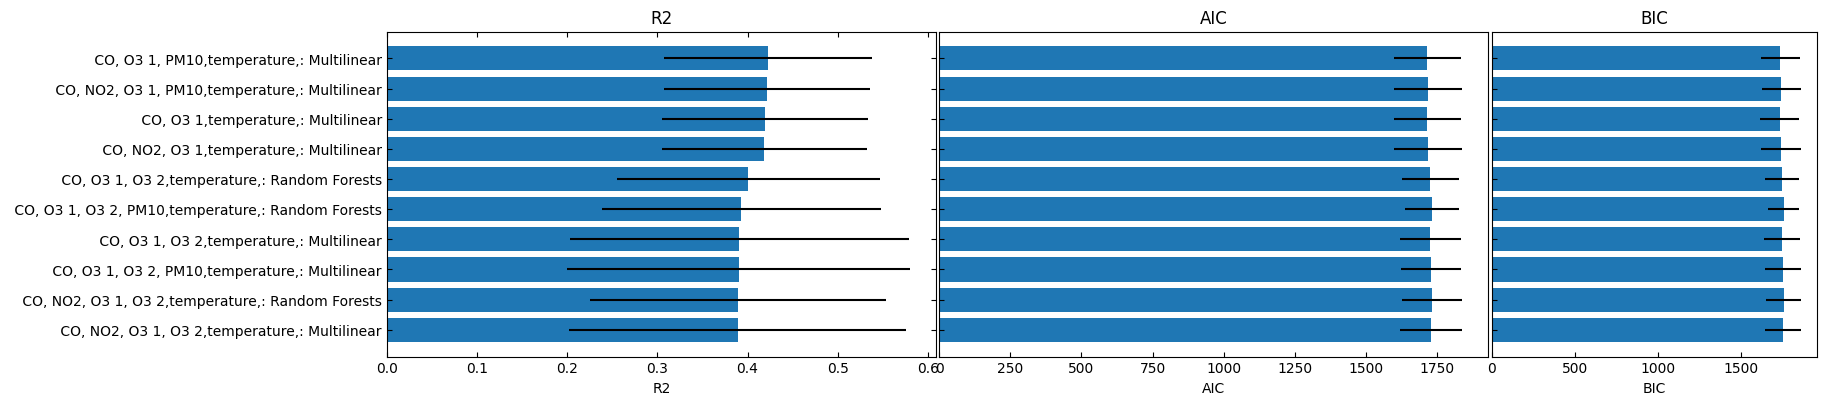

In [ ]:
r2_sorted_dataframe = (mean_r2_by_features_dataframe.sort_values(by=mean_r2_by_features_dataframe.index[0], axis=1, ascending=False))
features = r2_sorted_dataframe.columns

mean_r2 = r2_sorted_dataframe.values.flatten()
error_r2 = std_r2_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()

mean_aic = mean_aic_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()
error_aic = std_aic_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()

mean_bic = mean_bic_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()
error_bic = std_bic_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()

plot_metrics(features[:10], first_list=mean_r2[:10], first_error_list=error_r2[:10], first_title='R2', 
             second_list=mean_aic[:10], second_error_list=error_aic[:10], second_title='AIC',
             third_list=mean_bic[:10], third_error_list=error_bic[:10], third_title='BIC')

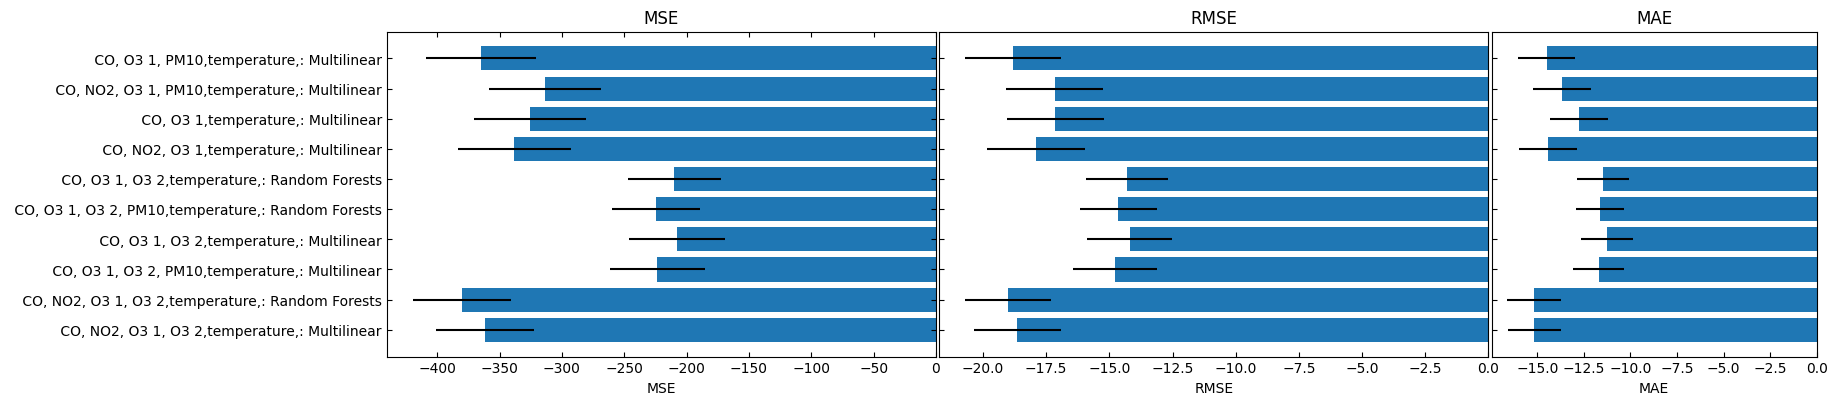

In [ ]:
mean_mse = mean_mse_by_features_dataframe.values.flatten()
error_mse = std_mse_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()

mean_rmse = mean_rmse_by_features_dataframe.values.flatten()
error_rmse = std_rmse_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()

mean_mae = mean_mae_by_features_dataframe.values.flatten()
error_mae = std_mae_by_features_dataframe[r2_sorted_dataframe.columns].values.flatten()

plot_metrics(features[:10], first_list=mean_mse[:10], first_error_list=error_mse[:10], first_title='MSE', 
             second_list=mean_rmse[:10], second_error_list=error_rmse[:10], second_title='RMSE',
             third_list=mean_mae[:10], third_error_list=error_mae[:10], third_title='MAE')